<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/quickstart.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/quickstart.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/quickstart.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/quickstart.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# FiftyOne Quickstart

Hello there! This notebook provides a brief walkthrough of [FiftyOne](https://voxel51.com/docs/fiftyone), highlighting features that will help you build better datasets and computer vision models.

We'll cover the following concepts:

- Loading a dataset [into FiftyOne](https://voxel51.com/docs/fiftyone/user_guide/dataset_creation/index.html)
- Using FiftyOne [in a notebook](https://voxel51.com/docs/fiftyone/environments/index.html#notebooks)
- Using [views](https://voxel51.com/docs/fiftyone/user_guide/using_views.html) and [the App](https://voxel51.com/docs/fiftyone/user_guide/app.html) to explore different aspects of your dataset
- [Evaluating](https://voxel51.com/docs/fiftyone/user_guide/evaluation.html) your model's predictions
- [Finding label mistakes](https://voxel51.com/docs/fiftyone/user_guide/brain.html#label-mistakes) in your datasets

## Install FiftyOne


In [ ]:
!pip install fiftyone

## Load a dataset

Let's get started by importing the FiftyOne library:

In [1]:
import fiftyone as fo

FiftyOne provides a number of helpful data/model resources to get you up and running on your projects. In this example, we'll load a small detection dataset from the [FiftyOne Dataset Zoo](https://voxel51.com/docs/fiftyone/user_guide/dataset_zoo/index.html).

The command below downloads the dataset from the web and loads it into a [FiftyOne Dataset](https://voxel51.com/docs/fiftyone/user_guide/basics.html) that we'll use to explore the capabilities of FiftyOne:

In [2]:
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("quickstart")

Dataset already downloaded
Loading existing dataset 'quickstart'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [3]:
print(dataset)

Name:        quickstart
Media type:  image
Num samples: 200
Persistent:  False
Tags:        []
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:        fiftyone.core.fields.FloatField
    predictions:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:           fiftyone.core.fields.IntField
    eval_fp:           fiftyone.core.fields.IntField
    eval_fn:           fiftyone.core.fields.IntField
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField


Now let's launch the [FiftyOne App](https://voxel51.com/docs/fiftyone/user_guide/app.html) so we can explore the dataset visually. Right away you will see that because we are in a notebook, an embedded instance of the App with our dataset loaded has been rendered in the cell's output.

The [Session](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) object created below is a bi-directional connection between your Python kernel and the FiftyOne App, as we'll see later.


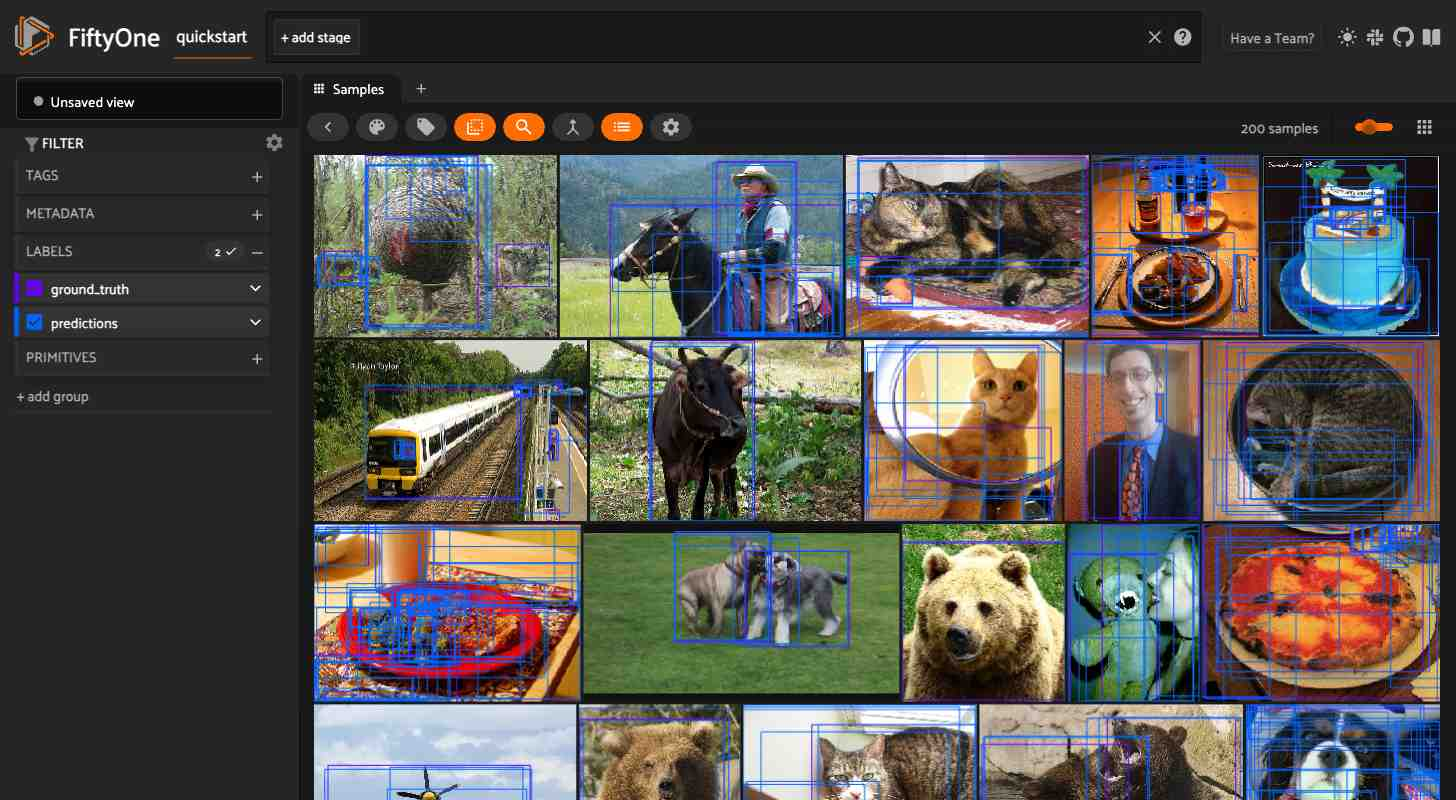

In [4]:
session = fo.launch_app(dataset)

## Automatic screenshots as you work

Notebooks are great for many reasons, one of which is the ability to share your work with others. FiftyOne is designed to help you write notebooks that capture your work on visual datasets, using a feature we call **automatic screenshotting**.

Whenever you open a new App instance in a notebook cell, e.g., by updating your [Session](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) object, any previous App instances will be automatically replaced with a static screenshot. In fact, that's what you're seeing below; screenshots of the Apps we opened when we created this notebook!

The cell below issues a [session.show()](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.show) command, which opens a new App instance in the cell's output. When you run the cell for yourself, notice that the App instance in the previous cell is automatically replaced with a screenshot of its current state. You can reactivate old App instances by hovering over them and clicking anywhere.

After running the cell below, try double-clicking on an image in the grid to expand the sample.

In [6]:
session.show()

## Dataset Views

The power of FiftyOne truly comes alive when using [dataset views](https://voxel51.com/docs/fiftyone/user_guide/using_views.html).

Think of a [Dataset](https://voxel51.com/docs/fiftyone/api/fiftyone.core.dataset.html#fiftyone.core.dataset.Dataset) as the root view into your all of your data. Creating a [DatasetView](https://voxel51.com/docs/fiftyone/api/fiftyone.core.view.html#fiftyone.core.view.DatasetView) allows you to study a specific subset of the samples and/or fields of your dataset.

Dataset views can be created and modified both in Python and in the App. The active view in the App is always available via the [Session.view](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.view) property of your session. This means that if you update your view in the App, its state will be captured by [Session.view](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.view). Or, you can create a view programmatically in Python and open it in the App by setting the [Session.view](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.view) property.

Let's start by creating a view into our dataset via the App:

 1. Look for `uniquness` under the `PRIMITIVES` field.
 2. Check the box next to `uniqueness` and toggle the slider to whatever value you'd like.
 3. click `+ add stage` in the **View Bar**. 
 4. Type in `SortBy`. 
 5. In the pop-up type in `uniqueness` as the field, then press the `Submit` button.
 6. Set `reverse` equal to `True`, by typing in `True`.

This will create a view that contains only the samples with a `uniqueness` score greater than the value you selected, sorted in descending order.



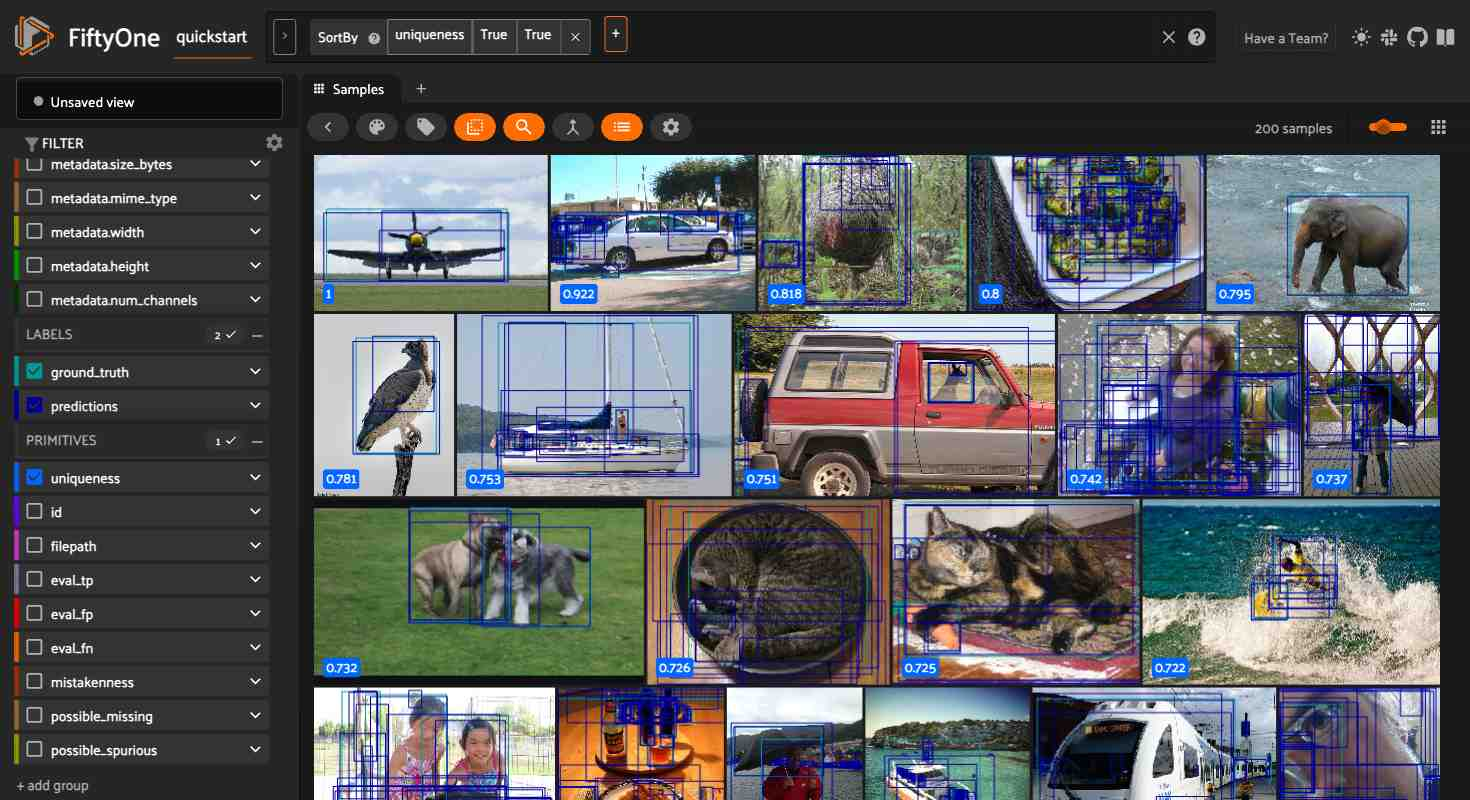

In [7]:
session.show()

We can then access the view in Python and, for example, print the most unique sample:

In [8]:
print(session.view.first())

<SampleView: {
    'id': '65e758da1ad82c673f1d9661',
    'media_type': 'image',
    'filepath': '/Users/harpreetsahota/fiftyone/quickstart/data/003486.jpg',
    'tags': ['validation'],
    'metadata': None,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '5f452482ef00e6374aacf803',
                'attributes': {},
                'tags': [],
                'label': 'airplane',
                'bounding_box': [
                    0.05365625,
                    0.34533957845433255,
                    0.769828125,
                    0.45049180327868854,
                ],
                'mask': None,
                'confidence': None,
                'index': None,
                'area': 23541.39925000001,
                'iscrowd': 0.0,
                'eval': 'tp',
                'eval_id': '5f452c60ef00e6374aad972f',
                'eval_iou': 0.9088153360375125,
                'mistakenness': 0.000776439905166626,


## Complex views in Python

Sometimes you may be interested in creating a [complex view](https://voxel51.com/docs/fiftyone/user_guide/using_views.html#view-stages) into a dataset that is specified by a series of conditions or complex filtering operations.

You can achieve this in FiftyOne by [chaining view stages](https://voxel51.com/docs/fiftyone/user_guide/using_views.html#tips-tricks) together to define the view you want.

As an example, let's create a view that contains only the 25 most unique samples in the dataset, and only predictions on those samples with confidence > 0.5.

Remember that, because we are working in a notebook, any time we change our [Session](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) object, a new App will be displayed in the cell's output.


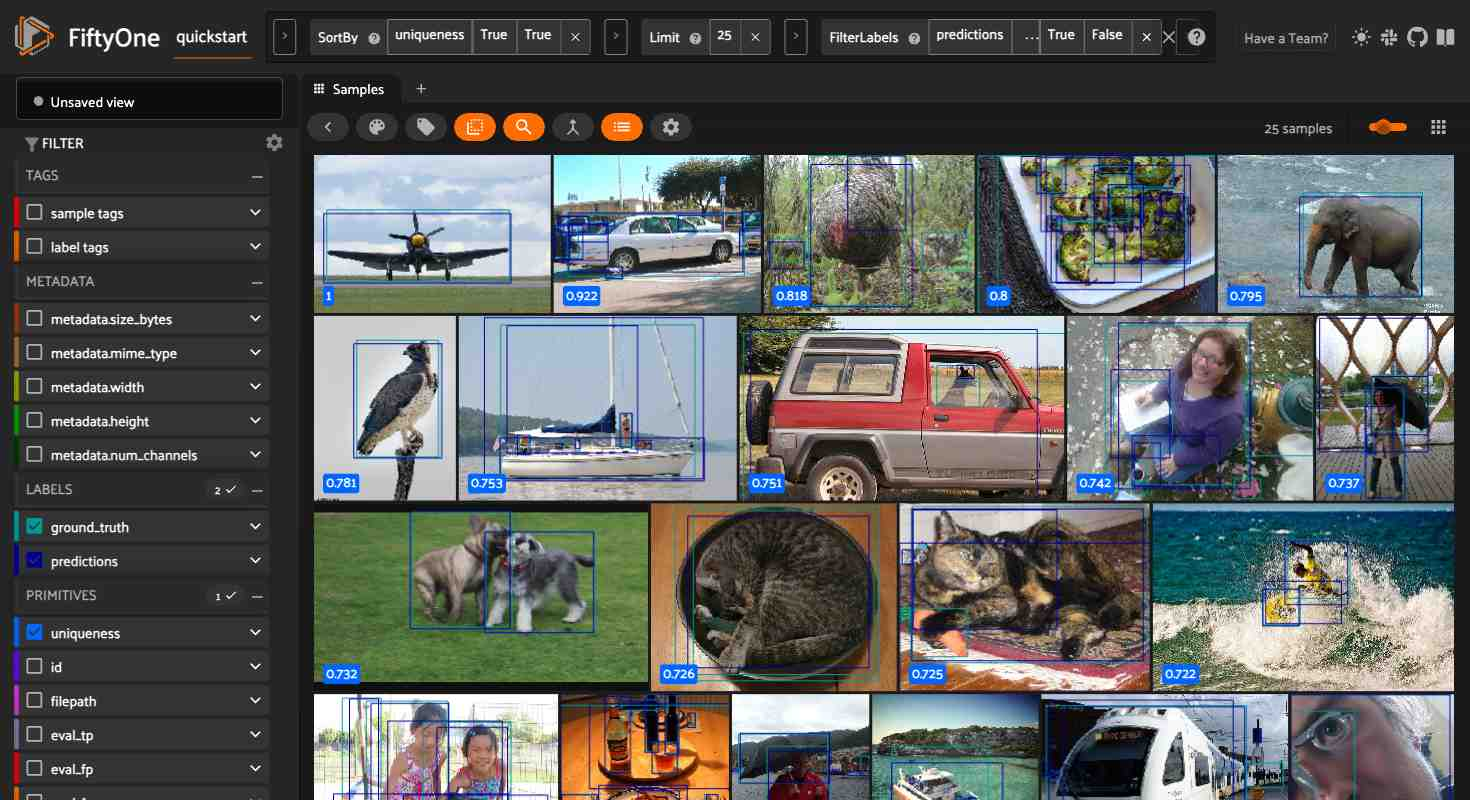

In [9]:
from fiftyone import ViewField as F

session.view = (
    dataset
    .sort_by("uniqueness", reverse=True)
    .limit(25)
    .filter_labels("predictions", F("confidence") > 0.5)
)

## Debugging your model

A primary use case of FiftyOne is being able to easily visualize and explore your model predictions to find failure cases that need to be addressed to improve performance.

The `quickstart` dataset already has predictions in its `predictions` field, but you can easily [add your own model predictions](https://voxel51.com/docs/fiftyone/recipes/model_inference.html) to datasets for a variety of tasks including [classification, detection, segmentation, keypoints, and more](https://voxel51.com/docs/fiftyone/user_guide/using_datasets.html#labels). Or, if you don't have your own model, you can check out the [FiftyOne Model Zoo](https://voxel51.com/docs/fiftyone/user_guide/model_zoo/index.html#fiftyone-model-zoo) to download a pre-trained model and generate predictions on your data with just a couple lines of code.

Once you have predictions on your dataset, you can use FiftyOne's powerful [evaluation framework](https://voxel51.com/docs/fiftyone/user_guide/evaluation.html) to evaluate it. For example, let's compute the COCO-style mean average precision (mAP) of our predictions using the builtin [evaluate_detections()](https://voxel51.com/docs/fiftyone/api/fiftyone.core.collections.html?highlight=evaluate_detections#fiftyone.core.collections.SampleCollection.evaluate_detections) method of our dataset:

In [10]:
# Computes the mAP of the predictions in the `predictions` field
# w.r.t. the ground truth labels in the `ground_truth` field
results = dataset.evaluate_detections(
    "predictions",
    gt_field="ground_truth",
    compute_mAP=True,
)

print("\nmAP: %.4f" % results.mAP())

Evaluating detections...
 100% |█████████████████| 200/200 [1.2s elapsed, 0s remaining, 162.9 samples/s]         
Performing IoU sweep...
 100% |█████████████████| 200/200 [1.8s elapsed, 0s remaining, 106.5 samples/s]         

mAP: 0.3957


Now let's evaluate only predictions with confidence greater than 0.75:

In [11]:
# Create a view that only contains predictions with confidence > 0.75
high_conf_view = dataset.filter_labels("predictions", F("confidence") > 0.75)

# Evaluate the predictions in the `predictions` field w.r.t. the ground truth
# labels in the `ground_truth` field
results = high_conf_view.evaluate_detections(
    "predictions",
    gt_field="ground_truth",
    eval_key="eval",
)

Evaluating detections...
 100% |█████████████████| 199/199 [1.5s elapsed, 0s remaining, 107.0 samples/s]         


The `results` object that is returned provides handy methods for generating various performance reports for our model.

For example, let's print a classification report for the top-10 most common object classes:

In [12]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes)

               precision    recall  f1-score   support

       person       0.85      0.72      0.78       412
         kite       0.84      0.68      0.75        91
          car       0.74      0.51      0.60        61
         bird       0.91      0.48      0.63        64
       carrot       0.58      0.40      0.47        47
         boat       0.62      0.35      0.45        37
    surfboard       0.63      0.40      0.49        30
     airplane       0.90      0.79      0.84        24
traffic light       0.88      0.62      0.73        24
     umbrella       0.91      0.72      0.81        29

    micro avg       0.82      0.63      0.71       819
    macro avg       0.79      0.57      0.66       819
 weighted avg       0.81      0.63      0.71       819



Aggregate metrics alone don’t give the full picture of a model's performance. In practice, the limiting factor of a model is often data quality issues that you need to **see** to address. FiftyOne is designed to make it easy to do just that.

Note that the last [evaluate_detections()](https://voxel51.com/docs/fiftyone/api/fiftyone.core.collections.html?highlight=evaluate_detections#fiftyone.core.collections.SampleCollection.evaluate_detections) method that we ran populated new fields on our dataset that count the number of true positives, false positives, and false negative objects in every sample:

In [13]:
print(dataset)

Name:        quickstart
Media type:  image
Num samples: 200
Persistent:  False
Tags:        []
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:        fiftyone.core.fields.FloatField
    predictions:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField
    eval_tp:           fiftyone.core.fields.IntField
    eval_fp:           fiftyone.core.fields.IntField
    eval_fn:           fiftyone.core.fields.IntField


Let's use this information to visualize the samples with the most false positives in the App:


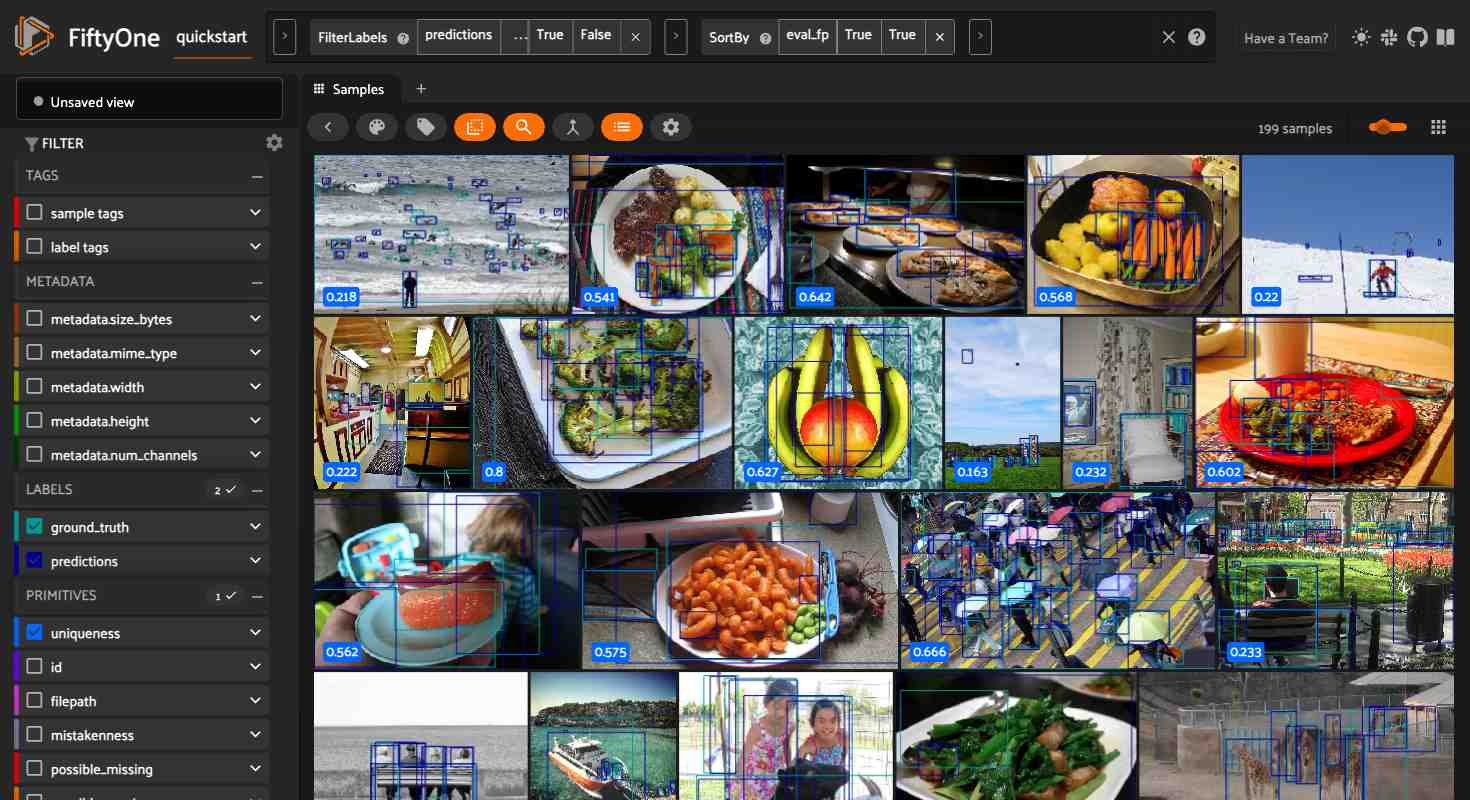

In [14]:
session.view = high_conf_view.sort_by("eval_fp", reverse=True)

You can see that the samples with the most number of false positives are crowded scenes, indicating that we should change our training scheme/dataset to better account for crowds of objects.

This is just a taste of the evaluation that can be done with FiftyOne. Check out our [tutorials](https://voxel51.com/docs/fiftyone/tutorials/index.html) and [blog posts](https://medium.com/voxel5) for more examples of debugging different kinds of models.

## Finding label mistakes

Another core use case of FiftyOne is to load and explore your dataset and annotations to get a feel for your data distribution and annotation quality.

In addition to self-guided analysis in the App, the [FiftyOne Brain](https://voxel51.com/docs/fiftyone/user_guide/brain.html#fiftyone-brain) provides methods that can help you gather insights about your dataset automatically:

- [Uniqueness](https://voxel51.com/docs/fiftyone/user_guide/brain.html#image-uniqueness) - A score comparing similarity in the content of images or image patches with all others in the dataset
- [Mistakenness](https://voxel51.com/docs/fiftyone/user_guide/brain.html#label-mistakes) - A score representing the liklihood of mistakenness for a given label
- [Hardness](https://voxel51.com/docs/fiftyone/user_guide/brain.html#sample-hardness) - A score representing how hard a sample is to train on allowing you to easily mine hard samples for your training set

Continuing with our `quickstart` dataset, let's compute the mistakenness of the annotations in the `ground_truth` field using the (high-confidence) model predictions in the `predictions` field of the dataset as a reference point:

In [15]:
import fiftyone.brain as fob

# Computes the mistakenness of the labels in the `ground_truth` field, 
# which scores the chance that the labels are incorrect, using the
# high confidence predictions in the `predictions` field as a reference
fob.compute_mistakenness(
    high_conf_view,
    "predictions",
    label_field="ground_truth",
    use_logits=False,
)

Evaluating detections...
 100% |█████████████████| 199/199 [1.6s elapsed, 0s remaining, 94.8 samples/s]          
Computing mistakenness...
 100% |█████████████████| 199/199 [668.4ms elapsed, 0s remaining, 297.7 samples/s]      
Mistakenness computation complete


Let's print the dataset's schema to see what happened:

In [16]:
print(dataset)

Name:        quickstart
Media type:  image
Num samples: 200
Persistent:  False
Tags:        []
Sample fields:
    id:                fiftyone.core.fields.ObjectIdField
    filepath:          fiftyone.core.fields.StringField
    tags:              fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:        fiftyone.core.fields.FloatField
    predictions:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    mistakenness:      fiftyone.core.fields.FloatField
    possible_missing:  fiftyone.core.fields.IntField
    possible_spurious: fiftyone.core.fields.IntField
    eval_tp:           fiftyone.core.fields.IntField
    eval_fp:           fiftyone.core.fields.IntField
    eval_fn:           fiftyone.core.fields.IntField


A numeric `mistakenness` field was added to each sample on the dataset, which measures the (maximum) mistakenness of the annotations in the sample.

In addition, each detection in the `ground_truth` field has been assigned a `mistakenness` value that measures it's likelihood of being incorrect:

In [17]:
# Ground truth detections now have a `mistakeness` value
sample = dataset.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '5f452471ef00e6374aac53c8',
    'attributes': {},
    'tags': [],
    'label': 'bird',
    'bounding_box': [0.21084375, 0.0034375, 0.46190625, 0.9442083333333334],
    'mask': None,
    'confidence': None,
    'index': None,
    'area': 73790.37944999996,
    'iscrowd': 0.0,
    'mistakenness': 0.01245725154876709,
    'mistakenness_loc': 0.2903442955979618,
    'eval': 'tp',
    'eval_id': '5f452c60ef00e6374aad9394',
    'eval_iou': 0.8575063187115628,
}>


Let's view the annotations that were flagged as likely mistakes in the App to see if we should fix any of them:


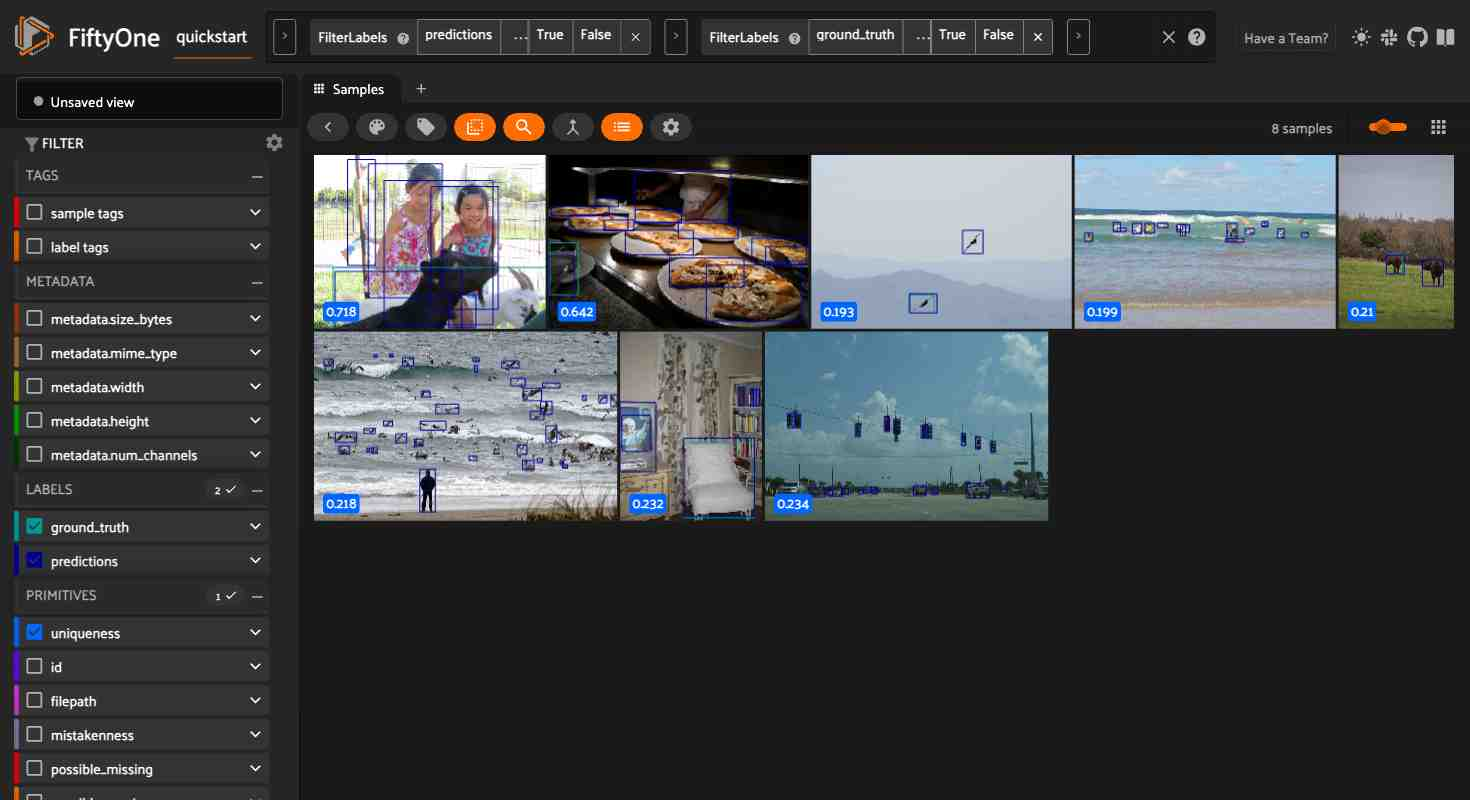

In [18]:
session.view = high_conf_view.filter_labels("ground_truth", F("mistakenness") > 0.95)

The `mistakenness` scores are computed using the confidence of the model predictions you provide. The model used to generate the predictions used here was [this Faster-RCNN model](https://voxel51.com/docs/fiftyone/user_guide/model_zoo/models.html#faster-rcnn-resnet50-fpn-coco-torch), which is a few years old. However, trying [other models from the Model Zoo](https://voxel51.com/docs/fiftyone/user_guide/model_zoo/models.html) will result in more informative `mistakenness` scores!

## Sharing notebooks

To make a notebook ready for sharing, you'll need to screenshot the currently active App by calling [Session.freeze()](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.freeze):

In [19]:
session.freeze()

Now when you share this notebook, publish it online, etc., all of your App outputs will be available for readers to see when they first open the notebook.

## Further reading

This quickstart touched on only a few of the possibilities of using FiftyOne. If you'd like to learn more, check out these [tutorials](https://voxel51.com/docs/fiftyone/tutorials/index.html) and [recipes](https://voxel51.com/docs/fiftyone/recipes/index.html) to see more concrete use cases and best practices.

And did we mention that FiftyOne is open source? Check out the project [on GitHub](https://github.com/voxel51/fiftyone) and [leave an issue](https://github.com/voxel51/fiftyone/issues/new/choose) if you think something is missing.

Thanks for tuning in!